## Heat Capacity of a Solid

In [1]:
import numpy as np

# Function to calculate sample points an weights for Gaussian quadrature
def gaussxw(N): # N is the number of sample points and order of Gaussian approximation to the integral

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Finding roots (or nodes) using Newton's method (will be taught soon)
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculating the weights using standard interval for Legendre polynomial
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

In [2]:
N = 50
# obtaining the sample point using the user-defined function gaussxw
x, w = gaussxw(N)

In [3]:
# constants
V      = 1000*1e-6    # 1000 cubic cm
rho    = 6.022e28     # per cubic m
thetaD = 428          # K
kb     = 1.38e-23     # J/K

def debye(x):
    return x**4*np.exp(x)/(np.exp(x)-1)**2

def Cv(T):
    a = 0.0
    b = thetaD/T
    h = (b-a)/N
    # re-sampling and mapping x and w to the integration domain (a,b)
    xp =  0.5*(b-a)*x + 0.5*(b+a)
    wp =  0.5*(b-a)*w
    # calculating the integration
    s = 0.0
    for k in range(N):
        s += wp[k]*debye(xp[k])
        # final result
    coefficient = 9*V*rho*kb*(T/thetaD)**3
    return coefficient*s

Text(0, 0.5, '$C_v\\ (T)$')

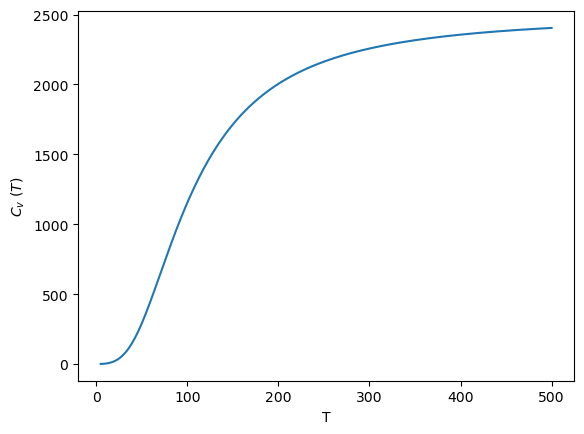

In [4]:
import matplotlib.pyplot as plt

T = np.arange(5,501)
C = []
for t in T:
    C.append(Cv(t))
plt.plot(T,C)
plt.xlabel('T')
plt.ylabel(r'$C_v\ (T)$')

## Electric Field of a Charge Distribution

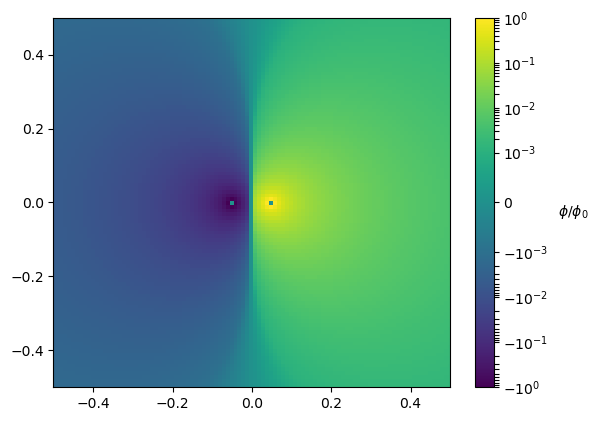

In [144]:
import matplotlib.colors as colors

k = 9e9    # N m^2/C^2
q1, q2 = 1, -1
L = 1      # m 

def V(r1,r2):
    return (k*q1/r1) + (k*q2/r2)

x = np.arange(-L/2,L/2+0.01, 0.01)
y = np.arange(-L/2,L/2+0.01, 0.01)
X, Y = np.meshgrid(x,y)

d = 0.1    # m
x1, y1 = d/2, 0
x2, y2 = -d/2, 0

R1 = np.sqrt((X-x1)**2+(Y-y1)**2)
R2 = np.sqrt((X-x2)**2+(Y-y2)**2)

V_r1r2 = V = V(R1,R2)

# removing the singularities, that is, the location of the charges
s1 = np.where((abs(X-x1)<1e-6) & (abs(Y-y1)<1e-6))
s2 = np.where((abs(X-x2)<1e-6) & (abs(Y-y2)<1e-6))
V_r1r2[s1], V_r1r2[s2] = 0, 0
Norm = (abs(V_r1r2.min())+V_r1r2.max())/2.    # the potential is calculated for positive and negative values and hence has a large range
V_r1r2 /= Norm   # normalizing potential for ease of plotting

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, V_r1r2, shading='auto',norm=colors.SymLogNorm(linthresh=1e-3,vmin=V_r1r2.min(), vmax=V_r1r2.max(), base=10))
# set the limits of the plot to the limits of the data
ax.axis([X.min(), X.max(), Y.min(), Y.max()])
cbar = fig.colorbar(c, ax=ax)
cbar.set_label(r"$\phi/\phi_0$",rotation=0,labelpad=18)
plt.show()

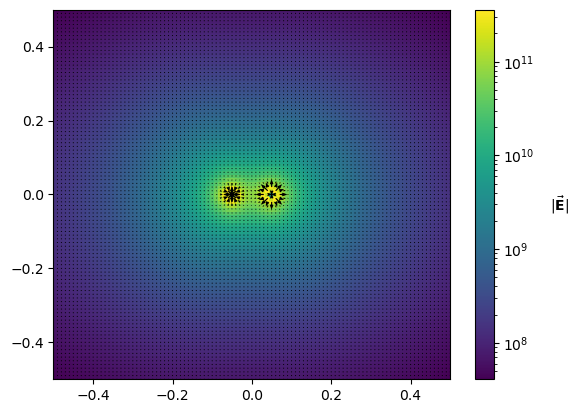

In [201]:
fig, ax = plt.subplots()

Ey, Ex = np.gradient(-V_r1r2*Norm)
E = np.sqrt(Ex**2+Ey**2)
# colormesh of the magnitude of E field
c = ax.pcolormesh(X, Y, E, shading='auto',norm=colors.LogNorm(vmin=E.min(), vmax=E.max()))
# set the limits of the plot to the limits of the data
ax.axis([X.min(), X.max(), Y.min(), Y.max()])
cbar = fig.colorbar(c, ax=ax)
cbar.set_label(r"$|\mathbf{\vec{E}}|$",rotation=0,labelpad=18)

# normalizing Ex and Ey for better visualization
Exnorm = (abs(Ex.min())+Ex.max())/2
Eynorm = (abs(Ey.min())+Ey.max())/2
Ex /= Exnorm
Ey /= Eynorm

# Q = ax.quiver(X[::3,::3], Y[::3,::3], Ex[::3,::3], Ey[::3,::3], width=0.003,headwidth=3., headlength=4.,scale=10)
Q = ax.quiver(X, Y, Ex, Ey, width=0.003,headwidth=3., headlength=4.,scale=50)
plt.show()

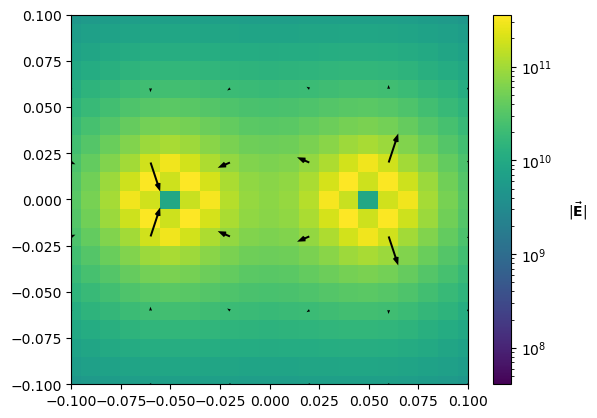

In [213]:
fig, ax = plt.subplots()

Ey, Ex = np.gradient(-V_r1r2*Norm)
E = np.sqrt(Ex**2+Ey**2)
# colormesh of the magnitude of E field
c = ax.pcolormesh(X, Y, E, shading='auto',norm=colors.LogNorm(vmin=E.min(), vmax=E.max()))
# set the limits of the plot to the limits of the data
ax.axis([0.2*X.min(), 0.2*X.max(), 0.2*Y.min(), 0.2*Y.max()])
cbar = fig.colorbar(c, ax=ax)
cbar.set_label(r"$|\mathbf{\vec{E}}|$",rotation=0,labelpad=18)

# normalizing Ex and Ey for better visualization
Exnorm = (abs(Ex.min())+Ex.max())/2
Eynorm = (abs(Ey.min())+Ey.max())/2
Ex /= Exnorm
Ey /= Eynorm

Q = ax.quiver(X[::4,::4], Y[::4,::4], Ex[::4,::4], Ey[::4,::4], width=0.005,headwidth=3., headlength=4.,scale=8)
# Q = ax.quiver(X, Y, Ex, Ey, width=0.003,headwidth=3., headlength=4.,scale=30)
plt.show()

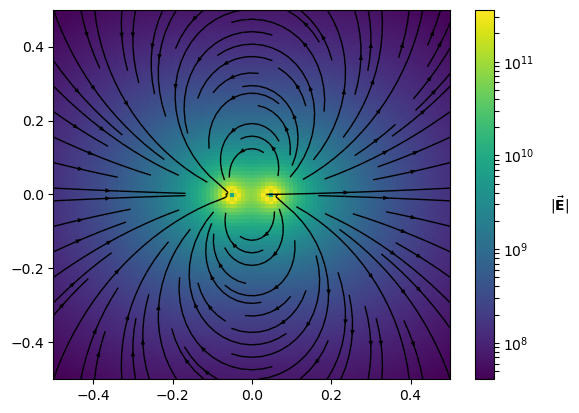

In [186]:
fig, ax = plt.subplots()
# a better alternative is to use streamplot
c = ax.pcolormesh(X, Y, E, shading='auto',norm=colors.SymLogNorm(linthresh=1e-3,vmin=E.min(), vmax=E.max(), base=10))
# set the limits of the plot to the limits of the data
ax.axis([X.min(), X.max(), Y.min(), Y.max()])
cbar = fig.colorbar(c, ax=ax)
cbar.set_label(r"$|\mathbf{\vec{E}}|$",rotation=0,labelpad=18)

Q = ax.streamplot(X, Y, Ex, Ey,color='k',linewidth=1,arrowsize=0.5)
plt.show()

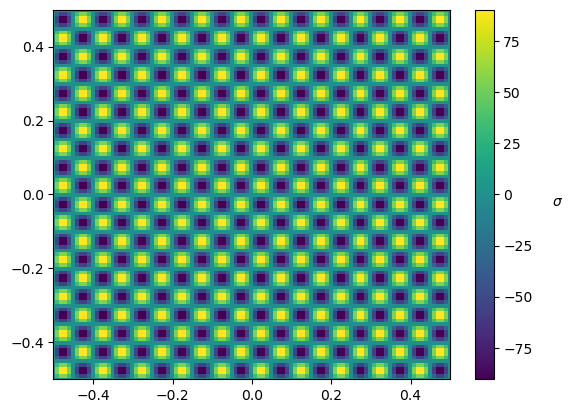

In [293]:
q0 = 100  # C/m^2
L0 = 0.1

def sigma(x,y):
    return q0*np.sin(2*np.pi*x/L0)*np.sin(2*np.pi*y/L0)

fig, ax = plt.subplots()
# plotting the charge per unit mass on the domain
c = ax.pcolormesh(X, Y, sigma(X,Y), shading='auto')#,norm=colors.SymLogNorm(linthresh=1e-3,vmin=E.min(), vmax=E.max(), base=10))
# set the limits of the plot to the limits of the data
ax.axis([X.min(), X.max(), Y.min(), Y.max()])
cbar = fig.colorbar(c, ax=ax)
cbar.set_label(r"$\sigma$",rotation=0,labelpad=18)
plt.show()

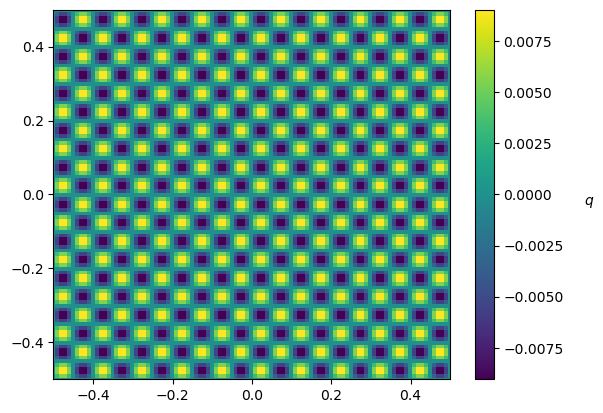

In [294]:
A = 0.01*0.01    # 1 cm x 1 cm boxes
q = A*sigma(X,Y)

fig, ax = plt.subplots()
# plotting the charge on the domain
c = ax.pcolormesh(X, Y, q, shading='auto')#,norm=colors.SymLogNorm(linthresh=1e-3,vmin=E.min(), vmax=E.max(), base=10))
# set the limits of the plot to the limits of the data
ax.axis([X.min(), X.max(), Y.min(), Y.max()])
cbar = fig.colorbar(c, ax=ax)
cbar.set_label(r"$q$",rotation=0,labelpad=18)
plt.show()

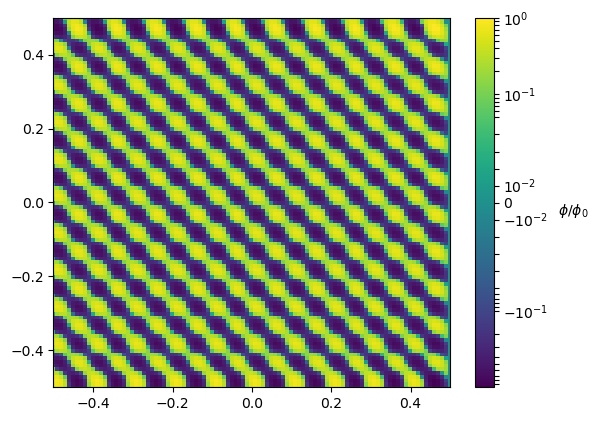

In [295]:
Vsigma = np.zeros((len(x),len(y)))
for j in range(len(y)):
    for i in range(len(x)):
        x0 = x[i]
        y0 = y[j]
        R  = np.sqrt((X-x0)**2+(Y-y0)**2)
        # removing the singularities, that is, the location of the charges
        s = np.where((abs(X-x0)<1e-6) & (abs(Y-y0)<1e-6))
        q0 = q
        q0[s] = 0
        R[s] = 1
        Vsigma[i][j]  = np.sum(k*q0/R)

Norm = (abs(Vsigma.min())+Vsigma.max())/2.    # the potential is calculated for positive and negative values and hence has a large range
Vsigma /= Norm   # normalizing potential for ease of plotting

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Vsigma, shading='auto',norm=colors.SymLogNorm(linthresh=5e-2,vmin=Vsigma.min(), vmax=Vsigma.max(), base=10))
# set the limits of the plot to the limits of the data
ax.axis([X.min(), X.max(), Y.min(), Y.max()])
cbar = fig.colorbar(c, ax=ax)
cbar.set_label(r"$\phi/\phi_0$",rotation=0,labelpad=18)
plt.show()       

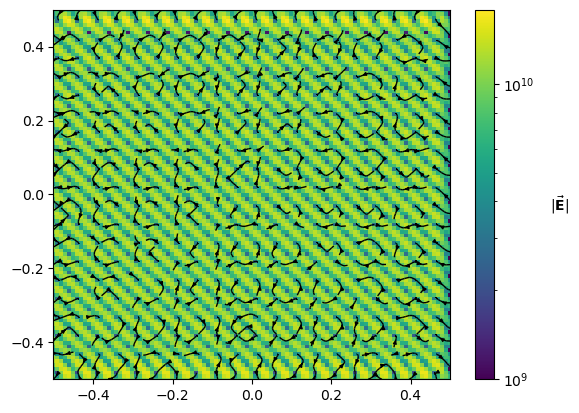

In [297]:
Ey, Ex = np.gradient(-Vsigma*Norm)
E = np.sqrt(Ex**2+Ey**2)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, E, shading='auto',norm=colors.LogNorm(vmin=1e9, vmax=E.max()))
# set the limits of the plot to the limits of the data
ax.axis([X.min(), X.max(), Y.min(), Y.max()])
cbar = fig.colorbar(c, ax=ax)
cbar.set_label(r"$|\mathbf{\vec{E}}|$",rotation=0,labelpad=18)
Q = ax.streamplot(X, Y, Ex, Ey,color='k',linewidth=1,arrowsize=0.5)
plt.show()  

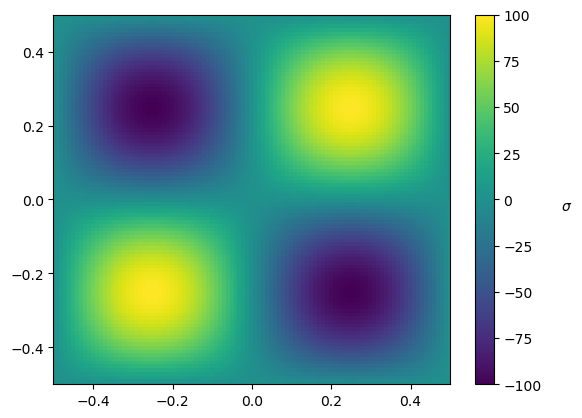

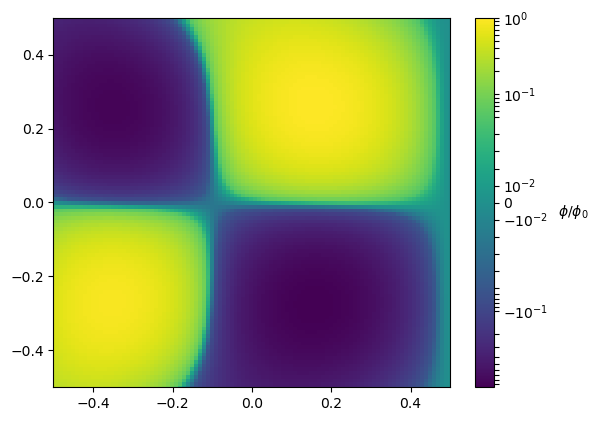

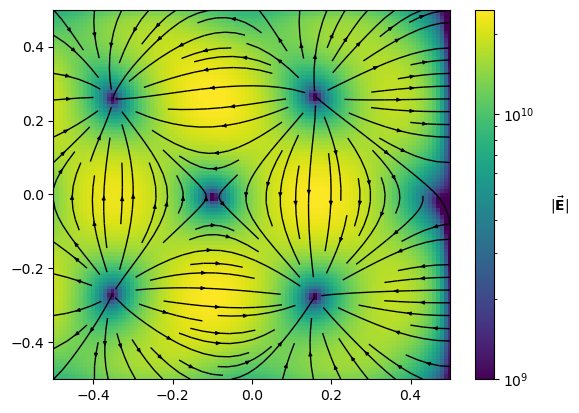

In [299]:
q0 = 100  # C/m^2
L0 = 1

def sigma(x,y):
    return q0*np.sin(2*np.pi*x/L0)*np.sin(2*np.pi*y/L0)

fig, ax = plt.subplots()
# plotting the charge per unit mass on the domain
c = ax.pcolormesh(X, Y, sigma(X,Y), shading='auto')#,norm=colors.SymLogNorm(linthresh=1e-3,vmin=E.min(), vmax=E.max(), base=10))
# set the limits of the plot to the limits of the data
ax.axis([X.min(), X.max(), Y.min(), Y.max()])
cbar = fig.colorbar(c, ax=ax)
cbar.set_label(r"$\sigma$",rotation=0,labelpad=18)
plt.show()

A = 0.01*0.01    # 1 cm x 1 cm boxes
q = A*sigma(X,Y)

Vsigma = np.zeros((len(x),len(y)))
for j in range(len(y)):
    for i in range(len(x)):
        x0 = x[i]
        y0 = y[j]
        R  = np.sqrt((X-x0)**2+(Y-y0)**2)
        # removing the singularities, that is, the location of the charges
        s = np.where((abs(X-x0)<1e-6) & (abs(Y-y0)<1e-6))
        q0 = q
        q0[s] = 0
        R[s] = 1
        Vsigma[i][j]  = np.sum(k*q0/R)

Norm = (abs(Vsigma.min())+Vsigma.max())/2.    # the potential is calculated for positive and negative values and hence has a large range
Vsigma /= Norm   # normalizing potential for ease of plotting

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, Vsigma, shading='auto',norm=colors.SymLogNorm(linthresh=5e-2,vmin=Vsigma.min(), vmax=Vsigma.max(), base=10))
# set the limits of the plot to the limits of the data
ax.axis([X.min(), X.max(), Y.min(), Y.max()])
cbar = fig.colorbar(c, ax=ax)
cbar.set_label(r"$\phi/\phi_0$",rotation=0,labelpad=18)
plt.show()       

Ey, Ex = np.gradient(-Vsigma*Norm)
E = np.sqrt(Ex**2+Ey**2)

fig, ax = plt.subplots()
c = ax.pcolormesh(X, Y, E, shading='auto',norm=colors.LogNorm(vmin=1e9, vmax=E.max()))
# set the limits of the plot to the limits of the data
ax.axis([X.min(), X.max(), Y.min(), Y.max()])
cbar = fig.colorbar(c, ax=ax)
cbar.set_label(r"$|\mathbf{\vec{E}}|$",rotation=0,labelpad=18)
Q = ax.streamplot(X, Y, Ex, Ey,color='k',linewidth=1,arrowsize=0.5)
plt.show()  